In [37]:
def display_data_stats(steering):
    if not type(steering) is np.ndarray:
        steering = np.array(steering)
        
    left_steering = steering[steering < 0]
    right_steering = steering[steering > 0]
    straight_steering = steering[steering == 0]

    std = np.std(steering)

    print('Steering Mean: {:.3f} Standard Deviation: {:.2f}'.format(np.mean(steering), std))
    print('Left steering samples: {} ({:<.2f}%)'.format(len(left_steering), len(left_steering) / len(steering) * 100))
    print('Right steering samples: {} ({:<.2f}%)'.format(len(right_steering), len(right_steering) / len(steering) * 100))
    print('Straight samples: {} ({:<.2f}%)'.format(len(straight_steering), len(straight_steering) / len(steering) * 100))

    hist, bins = np.histogram(steering, sbins=np.linspace(-1,1,21))

    plt.bar(bins[:-1], hist)
    plt.title('Distribution of steering angles')
    plt.show()

|-1.00 | 4| 0.050 % |
|-0.90 | 1| 0.012 % |
|-0.80 | 2| 0.025 % |
|-0.70 | 6| 0.075 % |
|-0.60 | 11| 0.137 % |
|-0.50 | 62| 0.772 % |
|-0.40 | 78| 0.971 % |
|-0.30 | 300| 3.733 % |
|-0.20 | 473| 5.886 % |
|-0.10 | 838| 10.428 % |
|0.00 | 5085| 63.278 % |
|0.10 | 781| 9.719 % |
|0.20 | 161| 2.003 % |
|0.30 | 172| 2.140 % |
|0.40 | 42| 0.523 % |
|0.50 | 12| 0.149 % |
|0.60 | 5| 0.062 % |
|0.70 | 1| 0.012 % |
|0.80 | 0| 0.000 % |
|0.90 | 2| 0.025 % |


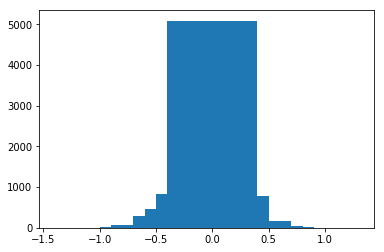

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../sim-data/sample-data/driving_log.csv")
y_steering = data.steering
total = len(y_steering)

count, bins = np.histogram(y_steering, bins=np.linspace(-1,1,21))

for b, c in zip(bins, count):
    print("|{:.2f} | {}| {:.3f} % |".format(b, c, c / total * 100))
    
plt.bar(bins[:-1], count)
plt.show()

Multi load
Loading  ../sim-data/sample-data
Steering len:  8036
Image loader len:  8036
Loading  ../sim-data/reverse
Steering len:  10763
Image loader len:  10763
Loading  ../sim-data/sides
Steering len:  11408
Image loader len:  11408
Loading  ../sim-data/normal
Steering len:  14017
Image loader len:  14017
All folderes loaded
Steering len:  14017
Image loader len:  14017
Choosing validation..
Before augmenting data: 9811
Using left and right camera images
Flipping images > 0.1 angle, before this: 19622
Changing brightness, before this: 21364
After augmenting data: 40986
Total validation data: 4206
45192
|-1.00 | 84| 0.186 % |
|-0.90 | 44| 0.097 % |
|-0.80 | 106| 0.235 % |
|-0.70 | 144| 0.319 % |
|-0.60 | 341| 0.755 % |
|-0.50 | 887| 1.963 % |
|-0.40 | 6830| 15.113 % |
|-0.30 | 2040| 4.514 % |
|-0.20 | 3506| 7.758 % |
|-0.10 | 3319| 7.344 % |
|0.00 | 15461| 34.212 % |
|0.10 | 2561| 5.667 % |
|0.20 | 6842| 15.140 % |
|0.30 | 1461| 3.233 % |
|0.40 | 915| 2.025 % |
|0.50 | 223| 0.493 % |

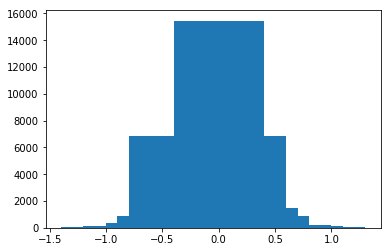

In [40]:
from generator import AugmentedMultiFolderGenerator

gen = AugmentedMultiFolderGenerator(batch_size = 128, val_percent = 0.3)
gen.load("../sim-data")
gen.shuffle_training()

steering = gen.y_steering
steering = np.hstack((steering, gen.y_steering_augmented))

total = len(steering)
print(total)

count, bins = np.histogram(steering, bins=np.linspace(-1,1,21))

for b, c in zip(bins, count):
    print("|{:.2f} | {}| {:.3f} % |".format(b, c, c / total * 100))
    
plt.bar(bins[:-1], count)
plt.show()